In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import LOG_REG
from sklearn.preprocessing import MinMaxScaler

In [12]:
dataset = pd.read_csv("heart.csv")
print(dataset.head())
X = dataset.values[:,:-1]

Y = dataset.values[:,-1]
X.shape,Y.shape
M = MinMaxScaler()
M.fit(X)
X = M.transform(X)
n,m = X.shape

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [86]:
class node():
    def __init__(self,X,Y,depth):
        self.X = X
        self.Y = Y
        self.depth = 1
        self.max_depth = max_depth
        self.depth = depth
        self.n = len(Y)
        print("Node number : ",self.depth,"dataset size = ",self.n)
        if (self.n>0):
            self.train(num_iter,epochs)

    def train(self,num_iter=10,epochs=10):
        self.L = LOG_REG.Log_Reg(learning_rate=0.01,iterations=num_iter)
        c = self.L.fit(self.X,self.Y)
        self.X1,self.X2,self.Y1,self.Y2 = self.split()
        print("node impurity = ",self.impurity(self.Y),"split1 impurity = ",self.impurity(self.Y1),"split2 impurity = ",self.impurity(self.Y2))
        if (self.depth < self.max_depth) and len(Y)>0:
            self.N1 = node(self.X1,self.Y1,self.depth+1)
            self.N2 = node(self.X2,self.Y2,self.depth+1)
        else:
            return 0

    def impurity(self,Y):
        y_1,y_0=0,0
        if len(Y)==0:
            return 1
        else:
            for i in Y:
                if i==0:
                    y_0+=1
                else:
                    y_1+=1
            y_1 = y_1/len(Y)
            y_0 = y_0/len(Y)
            #print(y_1,y_0,len(Y))
            return 1 - (y_1**2+y_0**2)

    def split(self):
        X1,X2,Y1,Y2=[],[],[],[]
        y = self.L.pred(self.X,self.L.a,self.L.b)
        l = len(self.Y)
        for i in range(l):
            if y[i]>0.5:
                X1.append(X[i]),Y1.append(Y[i])
            else:
                X2.append(X[i]),Y2.append(Y[i])
        self.impurity(Y1),self.impurity(Y2)
        return np.array(X1),np.array(X2),np.array(Y1),np.array(Y2)

In [87]:
num_iter=10
epochs=10
max_depth=3
tree = node(X,Y,1)

Node number :  1 dataset size =  303
node impurity =  0.4960298009999019 split1 impurity =  0.22043665286908531 split2 impurity =  0.4574652777777777
Node number :  2 dataset size =  111
node impurity =  0.22043665286908531 split1 impurity =  0.0 split2 impurity =  1
Node number :  3 dataset size =  111
node impurity =  0.0 split1 impurity =  0.0 split2 impurity =  1
Node number :  3 dataset size =  0
Node number :  2 dataset size =  192
node impurity =  0.4574652777777777 split1 impurity =  0.07133058984910856 split2 impurity =  0.2654912764003674
Node number :  3 dataset size =  27
node impurity =  0.07133058984910856 split1 impurity =  0.0 split2 impurity =  1
Node number :  3 dataset size =  165
node impurity =  0.2654912764003674 split1 impurity =  0.0 split2 impurity =  1


In [140]:
def predict(tree,X):
    y = []
    k=0
    for x in X:
        d=1
        k+=1
        node = tree
        while d<tree.max_depth:
            d+=1
            print(node.depth,tree.max_depth)
            p = node.L.pred(x,node.L.a,node.L.b)
            if p<0.5:
                node = node.N1
            else:
                node = node.N2
        if node.L.pred(x,node.L.a,node.L.b) > 0.5:
            print("Class of x = ",1)
            y.append(1)
        else:
            print("Class of x = ",0)
            y.append(0)            

In [141]:
print(Y[:10])
predict(tree,X[:10])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 3
2 3
Class of x =  1
1 3
2 3


AttributeError: 'node' object has no attribute 'L'

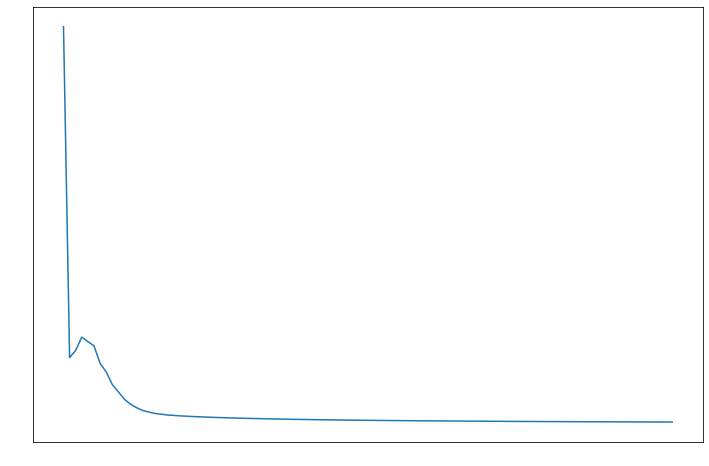

In [6]:
L = LOG_REG.Log_Reg(learning_rate=0.01,iterations=100)
c = L.fit(X,Y)
plt.figure(figsize=(12,8))
plt.rc_context({"xtick.color":"white","ytick.color":'white'})
plt.plot(c)
plt.show()

In [8]:
Dataset = None
e = 2.7

dataset = pd.read_csv("datasets_17860_23404_IRIS.csv")
dataset.head()

X = dataset.values[:,:4]
Y = dataset.values[:,-1]

X = X[0:100]
Y = np.concatenate((np.zeros(50),np.ones(50)))

X.shape,Y.shape

n,m = X.shape

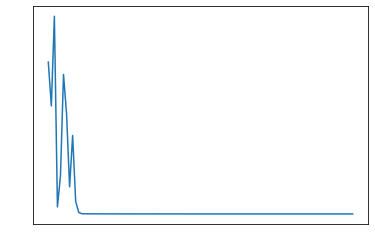

In [9]:
L = LOG_REG.Log_Reg(learning_rate=0.01,iterations=100)
c = L.fit(X,Y)
plt.rc_context({"xtick.color":"white","ytick.color":'white'})
plt.plot(c)
plt.show()